# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/twitch-data-all.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   channel              1000 non-null   object 
 2   watch_time_minutes   1000 non-null   int64  
 3   stream_time_minutes  1000 non-null   int64  
 4   peak_viewers         1000 non-null   int64  
 5   average_viewers      1000 non-null   int64  
 6   followers            1000 non-null   int64  
 7   followers_gained     1000 non-null   int64  
 8   views_gained         1000 non-null   int64  
 9   partnered            1000 non-null   bool   
 10  mature               1000 non-null   bool   
 11  language             1000 non-null   object 
 12  ranking              788 non-null    float64
 13  earnings_usd         788 non-null    float64
dtypes: bool(2), float64(2), int64(8), object(2)
memory usage: 95.8+ KB


In [5]:
df.isnull().sum()

Unnamed: 0               0
channel                  0
watch_time_minutes       0
stream_time_minutes      0
peak_viewers             0
average_viewers          0
followers                0
followers_gained         0
views_gained             0
partnered                0
mature                   0
language                 0
ranking                212
earnings_usd           212
dtype: int64

In [8]:
df_null = df[df['earnings_usd'].isnull()]
df_null

,Unnamed: 0,channel,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,partnered,mature,language,ranking,earnings_usd
12,12,Riot Games (riotgames),2674646715,80820,639375,20960,4487489,497678,56855694,True,False,English,NaN,NaN
17,17,풍월량 (hanryang1125),2186662470,181230,26999,12201,494445,92205,34405975,True,False,Korean,NaN,NaN
21,21,LCK_Korea,1916365860,47325,140557,39848,619382,255088,76225485,True,False,Korean,NaN,NaN
28,28,한동숙 (handongsuk),1621667925,127815,44976,12869,385250,73602,30610352,True,False,Korean,NaN,NaN
42,42,ROSHTEIN,1435735725,118995,45843,11717,381918,242369,17836875,False,True,English,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,크캣66 (crazzyccat),123279435,192780,2543,644,35930,24849,1889696,True,False,Korean,NaN,NaN
992,992,RelaxBeats,123273930,521430,2830,235,166162,29595,1094850,True,False,English,NaN,NaN
994,994,Destructoid,122628630,103020,14566,1190,48007,8995,87603521,True,False,English,NaN,NaN
996,996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean,NaN,NaN


In [13]:
# exclude rows without earnings
df = df[df['earnings_usd'].notnull()]

## Check distribution of key variables

Explore the distribution of numeric data variables. Some may be highly skewed and require a log transformation.

### Stream Time

<Axes: xlabel='stream_time_minutes', ylabel='Count'>

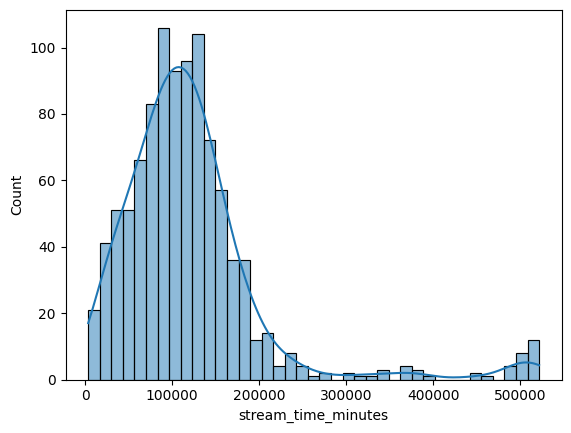

In [21]:
sns.histplot(df.stream_time_minutes, kde=True) 

<Axes: xlabel='stream_time_minutes', ylabel='Count'>

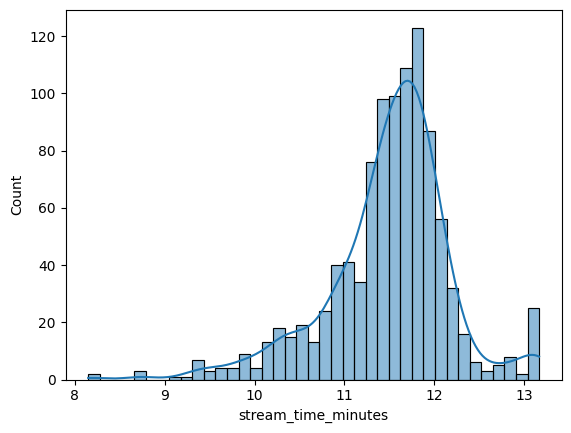

In [22]:
sns.histplot(np.log(df.stream_time_minutes), kde=True) 

### Watch time

<Axes: xlabel='watch_time_minutes', ylabel='Count'>

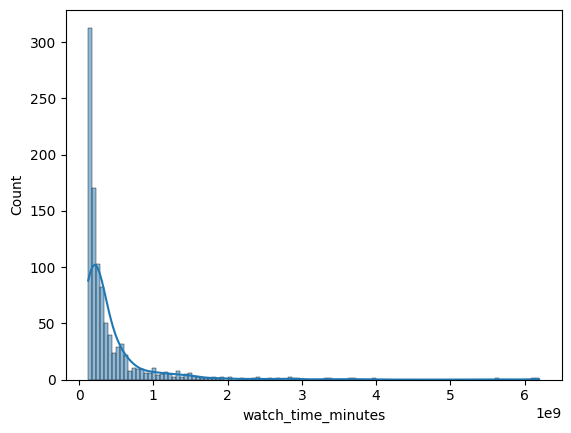

In [23]:
sns.histplot(df.watch_time_minutes, kde=True) 

Highly skewed distribution. Let's log transform.

<Axes: xlabel='watch_time_minutes', ylabel='Count'>

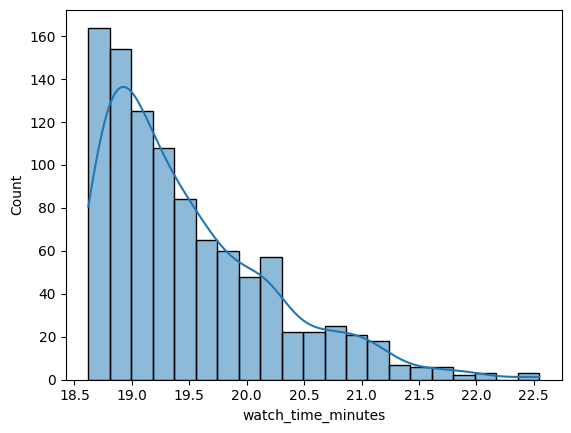

In [24]:
sns.histplot(np.log(df.watch_time_minutes), kde=True) 

### Average Viewers

<Axes: xlabel='average_viewers', ylabel='Count'>

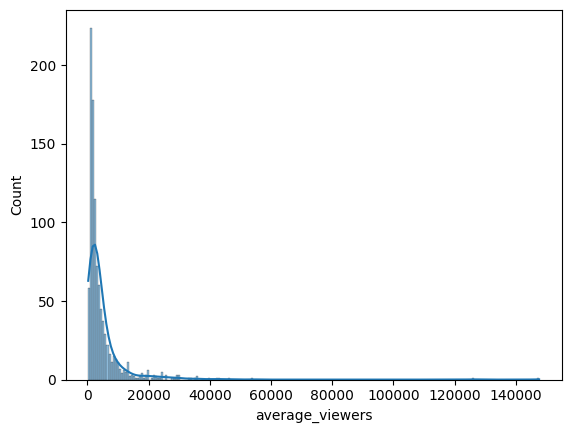

In [25]:
sns.histplot(df.average_viewers, kde=True) 

Text(0.5, 1.0, 'Distribution of Log-Transformed Average Viewers')

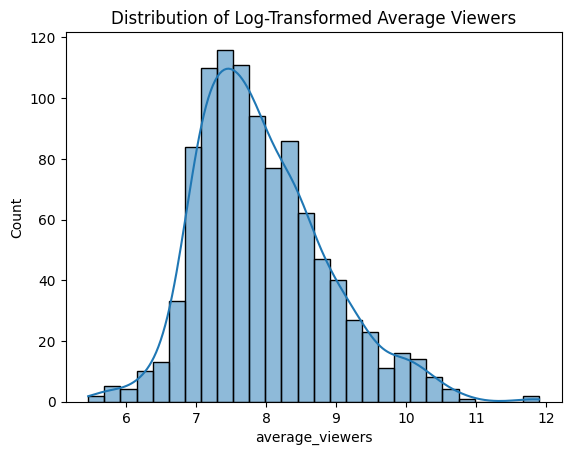

In [26]:
sns.histplot(np.log(df.average_viewers), kde=True) 
plt.title("Distribution of Log-Transformed Average Viewers")

<Axes: xlabel='followers', ylabel='Count'>

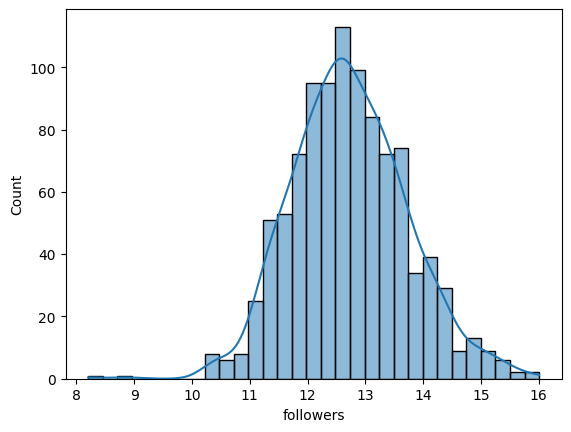

In [27]:
sns.histplot(np.log(df.followers), kde=True) 

<Axes: xlabel='followers_gained', ylabel='Count'>

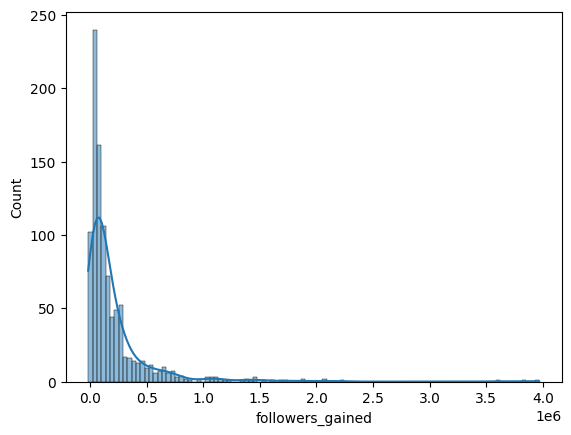

In [28]:
sns.histplot(df.followers_gained, kde=True) 
# sns.histplot(df.followers_gained, kde=True) 

Followers gained can be negative which makes log transformation not possible

In [30]:
print(df.followers_gained.min())
print(df.followers_gained.max())

-15772
3966525


<Axes: xlabel='views_gained', ylabel='Count'>

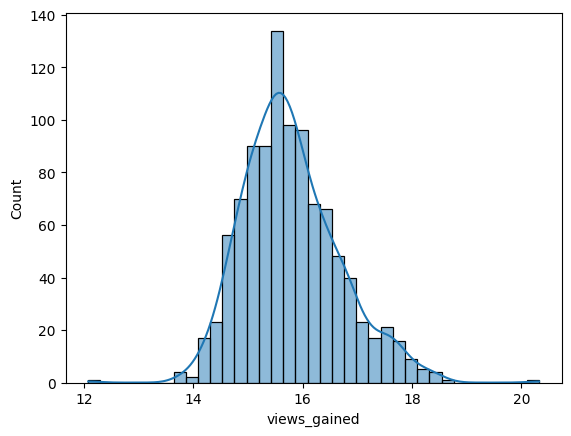

In [31]:
# sns.histplot(df.views_gained, kde=True) 
sns.histplot(np.log(df.views_gained), kde=True) 

<Axes: xlabel='earnings_usd', ylabel='Count'>

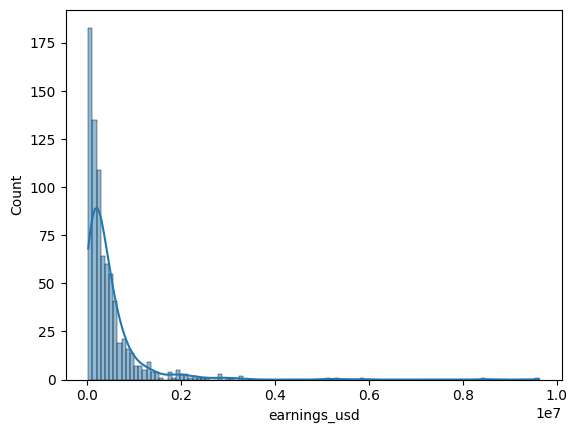

In [10]:
sns.histplot(df.earnings_usd, kde=True) 

In [32]:
df.groupby('partnered').size().sort_values(ascending=False)

partnered
True     978
False     22
dtype: int64

In [33]:
df.groupby('mature').size().sort_values(ascending=False)

mature
False    770
True     230
dtype: int64

In [34]:
df.groupby('language').size().sort_values(ascending=False)

language
English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Other           1
Greek           1
Slovak          1
Finnish         1
Swedish         1
dtype: int64